## Library

In [1]:
from numpy.random import random
from tensorflow.python.framework.meta_graph import read_meta_graph_file
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
# import tensorflow as tf 
# from tensorflow import keras
# from tensorflow.keras import layers, Input
# from tensorflow.keras.models import Sequential
import random

In [58]:
stockData = {}
tickers = ["MSFT", "AAPL", "FB", "TSLA"]
tails = []

for ticker in tickers:
    stockData[ticker] = yf.download(ticker, start = '2020-01-01', end = '2021-04-04') 

# msft_mean = np.mean(stockData['MSFT']['Adj Close'])
# msft_returns = (stockData["MSFT"]["Close"] - stockData['MSFT']["Open"])/stockData['MSFT']["Open"] + 1
# msft_returns.shape

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Definition of Function

In [41]:
def calc_returns(mu, so, lent):
    returns  = np.random.normal(mu, so, lent)
    return returns

In [97]:
def create_branch(runs, s_mu, s_so, ticker, scale, xlo, lent):
    
    mu = s_mu
    so = s_so
    diff_list = []
    mu_vector = []

    for i in range(int(runs)):
        diff = 0
        if i != 0:
            mu += scale
        d_returns = calc_returns(mu, so, lent)
        branch = []
        if xlo != 0:
            for i in range(xlo):
                branch.append(stockData[ticker]['Adj Close'][i])
        branch.append(stockData[ticker]['Adj Close'][xlo])
#         if i == 0:
#             branch.append(stockData[ticker]['Adj Close'][xlo])
#         else:
#             branch.append(tails[-1])

        mu_vector.append(mu)
    
        for j in range(len(d_returns)-1):
            branch.append((branch[-1] * (1 + d_returns[j])))
            diff += abs(stockData[ticker]['Adj Close'][xlo + j] - branch[j])
          
        tails.append(branch[-1])
        diff_list.append(diff)
        plt.plot(branch, label = "branch: {}, mean: {}".format(i + 1, mu))
        
    
    print(diff_list.index(min(diff_list)) + 1, mu_vector[diff_list.index(min(diff_list))], min(diff_list))
    final_mu = mu_vector[diff_list.index(min(diff_list))]
    
    return final_mu

In [49]:
def MCTS(runs, s_mu, s_so, splits, ticker, intra_scale, inter_scale):

    sectlen = len(stockData[ticker]['Adj Close']) // splits
    slo = 0
    mu = s_mu
    for i in range(splits):
        mu = create_branch(runs, mu, s_so, ticker, intra_scale, slo, sectlen)
        slo += sectlen
        intra_scale = intra_scale * inter_scale

In [7]:
num_runs = int(input('Number of runs: '))

Number of runs:  3


In [8]:
num_splits = int(input('Number of generations: '))

Number of generations:  3


In [ ]:
Msft = []
for price in stockData['MSFT']['Adj Close']:
    Msft.append(price)

In [70]:
Aapl = []
for price in stockData['AAPL']['Adj Close']:
    Aapl.append(price)

In [73]:
Tsla = []
for price in stockData['TSLA']['Adj Close']:
    Tsla.append(price)

In [74]:
Fb = []
for price in stockData['FB']['Adj Close']:
    Fb.append(price)

## Visualization

In [116]:
1277/105/200

0.060809523809523806

3 0.0009000000000000001 2206.3636584129667
1 0.0009000000000000001 6126.460006713867
1 0.0009000000000000001 7879.059844970703


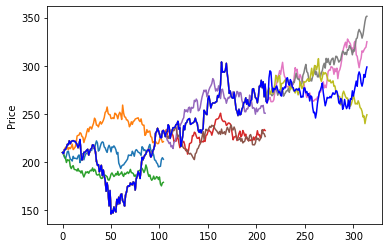

In [114]:
MCTS(num_runs, 0.0007, 0.015, num_splits, 'FB', 0.0001, 0.1)
plt.plot(Fb, label = "FB", color = "blue")
plt.ylabel('Price')
# plt.legend()
plt.show()

2 0.0009000000000000001 2790.9493211201766
1 0.0009200000000000001 21277.51983642578
1 0.0009220000000000002 55823.49186706543


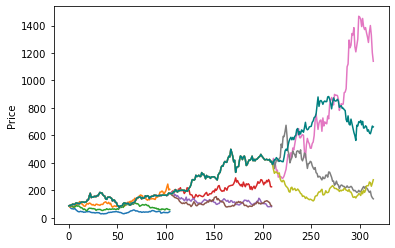

In [88]:
MCTS(num_runs, 0.0007, 0.07, num_splits, 'TSLA', 0.0001, 0.1)
plt.plot(Tsla, label = "TSLA", color = "teal")
plt.ylabel('Price')
# plt.legend()
plt.show()

3 0.0009000000000000001 535.7403230673464
1 0.0009200000000000001 3451.7233238220215
1 0.0009220000000000002 5492.778575897217


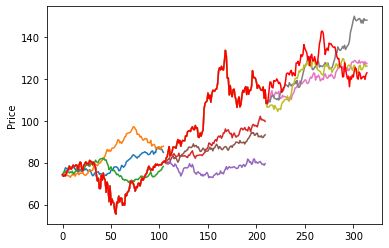

In [96]:
MCTS(num_runs, 0.0007, 0.01, num_splits, 'AAPL', 0.0001, 0.1)
plt.plot(Aapl, label = "AAPL", color = "red")
plt.ylabel('Price')
# plt.legend()
plt.show()

2 0.0009000000000000001 1277.4799147393073
1 0.0009200000000000001 4060.799102783203
1 0.0009220000000000002 5987.664642333984


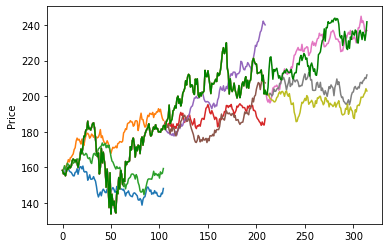

In [21]:
MCTS(num_runs, 0.0007, 0.01, num_splits, 'MSFT', 0.0001, 0.1)
plt.plot(stock, label = "MSFT", color = "green")
plt.ylabel('Pricea')
# plt.legend()
plt.show()

End.